<a href="https://colab.research.google.com/github/quarcs-lab/pysalnarsc19/blob/master/content/130_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisation

## Install external libraries

In [0]:
!pip install -q geopandas
!pip install -q seaborn

## Load libraries

In [0]:
import geopandas
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

## Clone public Github reposity

In [0]:
# Only the first time
# !git clone --recursive https://github.com/quarcs-lab/pysalnarsc19.git

In [67]:
# Let us see what we have inside content/data Folder
!ls pysalnarsc19/content/data

airbnb.cpg			  participants2016.csv
airbnb.dbf			  participants2017.csv
airbnb.prj			  participants2018.csv
airbnb.shp			  README.md
airbnb.shx			  riverside_city.dbf
airports.csv			  riverside_city.prj
b500.cpg			  riverside_city.qpj
b500.dbf			  riverside_city.shp
b500.prj			  riverside_city.shx
b500.shp			  san_diego.cpg
b500.shx			  san_diego.dbf
behavioralHealth.dbf		  san_diego.prj
behavioralHealth.prj		  san_diego.shp
behavioralHealth.qpj		  san_diego.shx
behavioralHealth.shp		  san_diego.tif
behavioralHealth.shx		  sd_tracts_acs_clean.dbf
CAINC1__ALL_STATES_1969_2017.csv  sd_tracts_acs_clean.prj
CAINC1__definition.xml		  sd_tracts_acs_clean.qpj
CAINC1__Footnotes.html		  sd_tracts_acs_clean.shp
california_tracts.cpg		  sd_tracts_acs_clean.shx
california_tracts.dbf		  texas.dbf
california_tracts.prj		  texas.geojson
california_tracts.shp		  texas.prj
california_tracts.shx		  texas.qgs
city_tracts.cpg			  texas.qpj
city_tracts.dbf			  texas.shp
city_tracts.prj			  texas.shx
city_t

## Load data (from cloned repository)

In [0]:
db = geopandas.read_file('pysalnarsc19/content/data/texas.shp')

## Non-spatial visualisation

### Univariate continuous

* Histograms

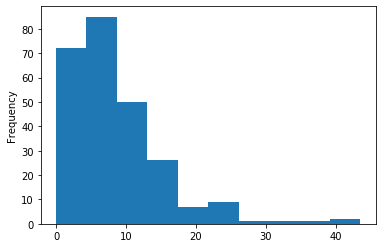

In [69]:
db['HR90'].plot.hist()

* KDEs

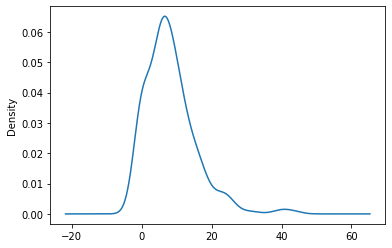

In [70]:
db['HR90'].plot.kde()

### Bivariate continuous

* Scatter plots

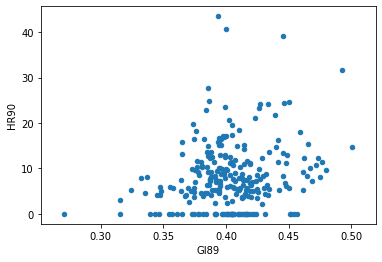

In [71]:
db[['GI89', 'HR90']]\
  .plot.scatter('GI89', 
                'HR90')

* Hexbin plots

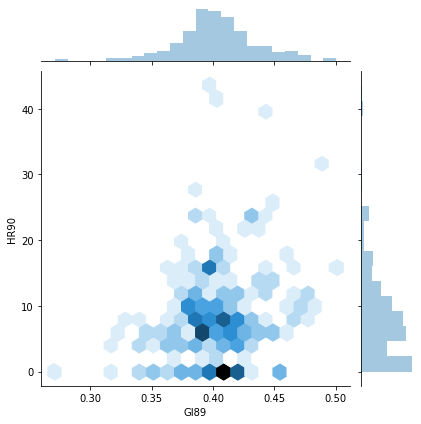

In [72]:
seaborn.jointplot('GI89', 
                  'HR90', 
                  db, 
                  kind='hex')

* 2D KDEs

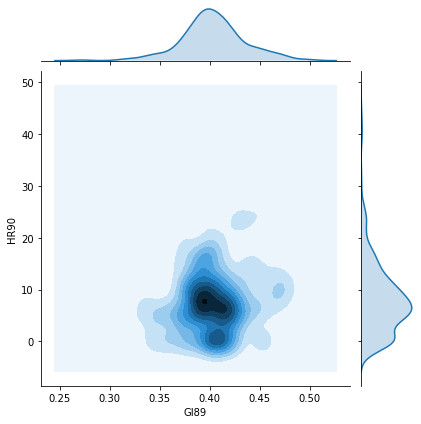

In [73]:
seaborn.jointplot('GI89', 
                  'HR90', 
                  db, 
                  kind='kde')

### Categorical plots

* Categorical scatter plots

In [74]:
db.PO90

0        3143
1        2858
2        5461
3        5848
4        9128
        ...  
249       460
250     40518
251    383545
252     17705
253    260120
Name: PO90, Length: 254, dtype: int64

In [0]:
p90max = db.PO90.max()

In [0]:
width = int(p90max/3)+2
db['pop_cats'] = pandas.cut(db.PO90, [0, 5000, 100000, p90max])

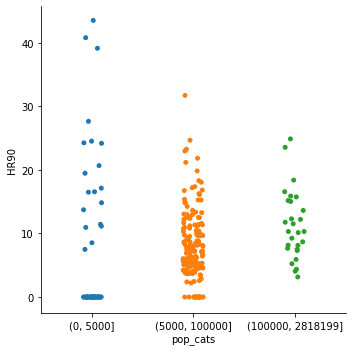

In [77]:
seaborn.catplot(x="pop_cats",
                y="HR90",
                data=db)

* Box plots

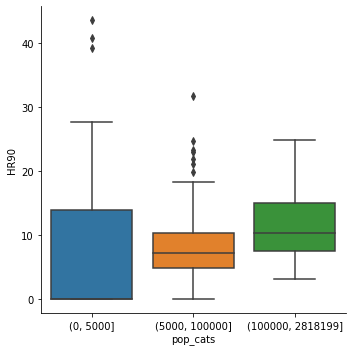

In [78]:
seaborn.catplot(x="pop_cats",
                y="HR90",
                data=db,
                kind='box')

* Violin plots

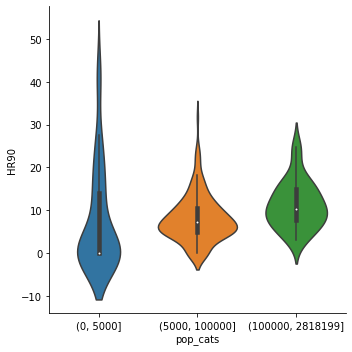

In [79]:
seaborn.catplot(x="pop_cats",
                y="HR90",
                data=db,
                kind='violin')

## Anatomy of a graphic

### Figures

In [80]:
f = plt.figure()

<Figure size 432x288 with 0 Axes>

* Change size

In [81]:
# Size
f = plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

### Axes

* One axis (`ax`) inside a figure (`f`)

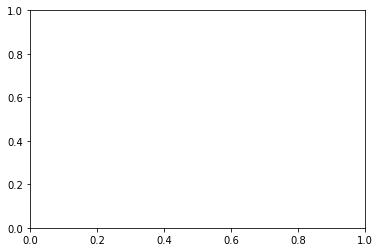

In [82]:
f, ax = plt.subplots(1)

* Two rows, one column of axes (`axs`) inside a figure (`f`)

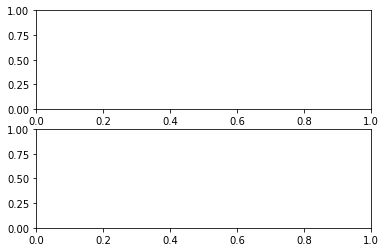

In [83]:
f, axs = plt.subplots(2)

* One row, two columns of axes (`axs`) inside a figure (`f`)

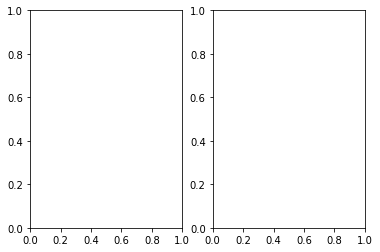

In [84]:
f, axs = plt.subplots(1, 2)

* Embed data on an axis

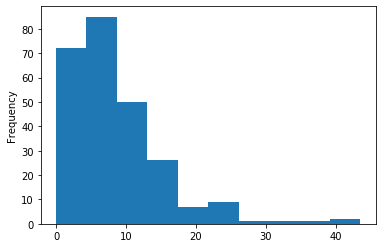

In [85]:
f, ax = plt.subplots(1)
db['HR90'].plot.hist()
#db.plot(ax=ax)

* Embed data on two axes

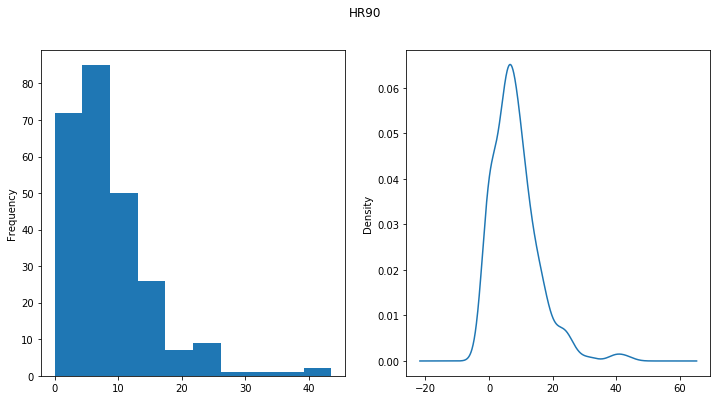

In [86]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
# First axis

db['HR90'].plot.hist(ax=axs[0])
# Second axis
db['HR90'].plot.kde(ax=axs[1])
# Title
f.suptitle("HR90")
# Display
plt.show()

### Layers

* Tweak a layer

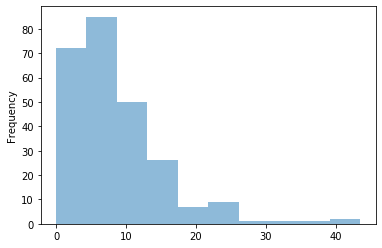

In [87]:
# Transparency
db.HR90.plot.hist(alpha=0.5)

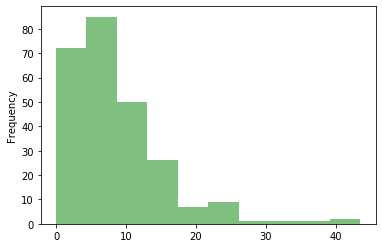

In [88]:
# color and transparency
db.HR90.plot.hist(alpha=0.5, color='green')

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-
sa/4.0/"><img alt="Creative Commons License" style="border-width:0"
src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span
xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Visualization</span> by <a xmlns:cc="http://creativecommons.org/ns#"
href="http://sergerey.org" property="cc:attributionName"
rel="cc:attributionURL">Serge Rey</a> is licensed under a <a
rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative
Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.